In [255]:
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

### Zadanie 1

In [256]:
mean = 2
std = 30
size = 200
sample = np.random.normal(mean, std, size)

In [257]:

hypothetical_mean = 2.5
t, p = stats.ttest_1samp(sample, hypothetical_mean)
print("t = ", t)
print("p = ", p)

alpha = 0.05
if p < alpha:
    print("Odrzucamy hipotezę zerową")
else:
    print("Nie możemy odrzucić hipotezy zerowej")

t =  -0.6916932234463024
p =  0.48993620015619055
Nie możemy odrzucić hipotezy zerowej


### Zadanie 2

In [258]:
df = pd.read_csv('napoje.csv',sep=';')
df

,mies,rok,pepsi,fanta,żywiec,okocim,regionalne,cola,lech
0,1,2001,108447,43302,186385,54301,45065,227013,56306
1,2,2001,105439,46711,168782,68131,43933,221115,67212
2,3,2001,111675,36029,172186,63104,46663,222812,67398
3,4,2001,113232,33659,172445,50871,45195,238631,57100
4,5,2001,110274,40853,174526,67924,47926,222963,65001
...,...,...,...,...,...,...,...,...,...
187,8,2016,105949,43017,169329,64262,58101,222531,58037
188,9,2016,103420,44310,173923,67591,44565,230270,65156
189,10,2016,120363,50688,175856,63791,51376,247155,59276
190,11,2016,101215,41924,175914,62570,59505,240524,61765


In [259]:
lech_mean = round(df['lech'].mean(),1)
cola_mean = round(df['cola'].mean(),1)
regional_mean = round(df['regionalne'].mean(),1)

print(f'Średnie spożycie Lecha 60500 Średnie spożycie coli 222000 Średnie spożycie regionalnego 43500')
print(f'{lech_mean}   {cola_mean}   {regional_mean}')


Średnie spożycie Lecha 60500 Średnie spożycie coli 222000 Średnie spożycie regionalnego 43500
61091.3   226389.5   48668.0


### zadanie 3

In [260]:
import scipy.stats as stats

pvalue = stats.shapiro(df['lech'])[1]

if pvalue > 0.05:
    print("Dane wykazują normalność", pvalue)
else:
    print("Dane nie wykazują normalności", pvalue)



Dane wykazują normalność 0.5875554084777832


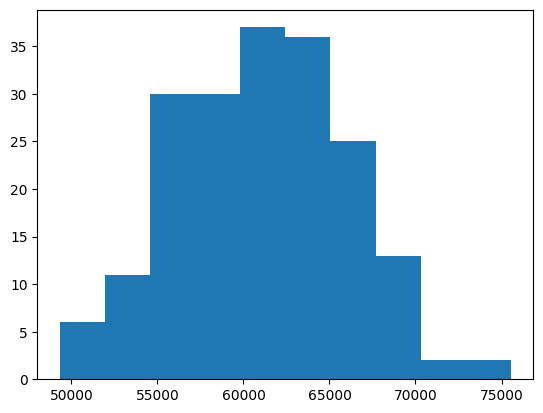

In [261]:
plt.hist(df['lech'])
plt.show()

In [262]:
import scipy.stats as stats

pvalue = stats.shapiro(df['regionalne'])[1]

if pvalue > 0.05:
    print("Dane wykazują normalność", pvalue)
else:
    print("Dane nie wykazują normalności", pvalue)



Dane nie wykazują normalności 1.8769230791804148e-07


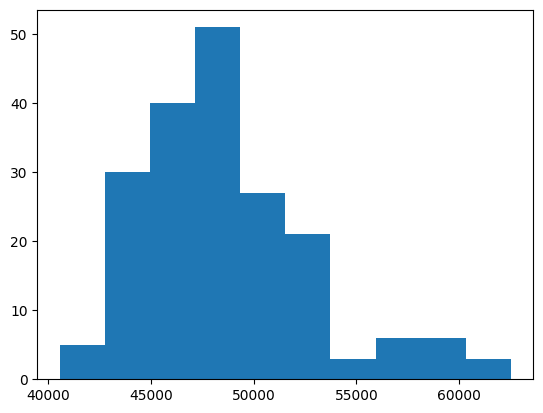

In [263]:
plt.hist(df['regionalne'])
plt.show()

### zadanie 4

In [264]:
okocim_lech = stats.ttest_ind(df['okocim'], df['lech'])
fanta_reg = stats.ttest_ind(df['fanta '], df['regionalne'])
cola_pepsi = stats.ttest_ind(df['cola'], df['pepsi'])
print(okocim_lech)
print(fanta_reg)
print(cola_pepsi)

Ttest_indResult(statistic=-0.8323919685480173, pvalue=0.4057078093583594)
Ttest_indResult(statistic=-11.013919429372727, pvalue=1.097001288015355e-24)
Ttest_indResult(statistic=145.61815604546564, pvalue=0.0)


In [265]:
okocim_lech = stats.mannwhitneyu(df['okocim'], df['lech'])
fanta_reg = stats.mannwhitneyu(df['fanta '], df['regionalne'])
cola_pepsi = stats.mannwhitneyu(df['cola'], df['pepsi'])
print(okocim_lech)
print(fanta_reg)
print(cola_pepsi)

MannwhitneyuResult(statistic=17861.5, pvalue=0.6001922392671175)
MannwhitneyuResult(statistic=8106.5, pvalue=2.223371766550974e-21)
MannwhitneyuResult(statistic=36864.0, pvalue=1.9894396616299057e-64)


### zadanie 5

In [266]:
okocim_lech = stats.f_oneway(df['okocim'], df['lech'])
zyw_fanta = stats.f_oneway(df['żywiec'], df['fanta '])
reg_pcola = stats.f_oneway(df['regionalne'], df['cola'])

print(okocim_lech)
print(zyw_fanta)
print(reg_pcola)

F_onewayResult(statistic=0.6928763893032434, pvalue=0.4057078093583606)
F_onewayResult(statistic=70185.88074802411, pvalue=0.0)
F_onewayResult(statistic=56462.96887396712, pvalue=0.0)


### zadanie 6

In [267]:
regional2001 = df[(df['rok'] == 2001)]['regionalne']
regional2015 = df[(df['rok'] == 2015)]['regionalne']

In [268]:
t_test = stats.ttest_ind(regional2001, regional2015)
print(t_test)

Ttest_indResult(statistic=-3.5977780582718273, pvalue=0.0016000242362201897)


### zadanie 7

In [269]:
df_po_reklamie = pd.read_csv('napoje_po_reklamie.csv',sep=';')
df_po_reklamie

,mies,pepsi,fanta,żywiec,okocim,regionalne,cola,lech
0,1,119110,41386,186272,64398,55561,215468,68673
1,2,107424,45669,178564,61847,48793,233941,68483
2,3,105748,47373,183368,53390,63907,229677,63300
3,4,115377,39395,184326,60062,58531,234246,61943
4,5,103003,42477,182190,63736,51395,219392,64189
5,6,102809,47224,183115,52596,55149,219600,63343
6,7,106890,45185,184858,54457,52977,225857,63466
7,8,103613,38748,185559,61437,61143,226311,68841
8,9,112709,34145,186496,62945,59051,232491,65195
9,10,112780,37407,182187,67979,60212,235802,57058


In [271]:
cola_2016 = df[(df['rok'] == 2016)]['cola']
cola_po_reklamie = df_po_reklamie['cola']

fanta_2016 = df[(df['rok'] == 2016)]['fanta ']
fanta_po_reklamie = df_po_reklamie['fanta ']

pepsi_2016 = df[(df['rok'] == 2016)]['pepsi']
pepsi_po_reklamie = df_po_reklamie['pepsi']

cola_test = stats.wilcoxon(cola_2016, cola_po_reklamie)
fanta_test = stats.wilcoxon(fanta_2016, fanta_po_reklamie)
pepsi_test = stats.wilcoxon(pepsi_2016, pepsi_po_reklamie)

print(cola_test)
print(fanta_test)
print(pepsi_test)

WilcoxonResult(statistic=37.0, pvalue=0.90966796875)
WilcoxonResult(statistic=35.0, pvalue=0.791015625)
WilcoxonResult(statistic=37.0, pvalue=0.90966796875)
